# [What is a neural network](https://www.knime.com/blog/a-friendly-introduction-to-deep-neural-networks)

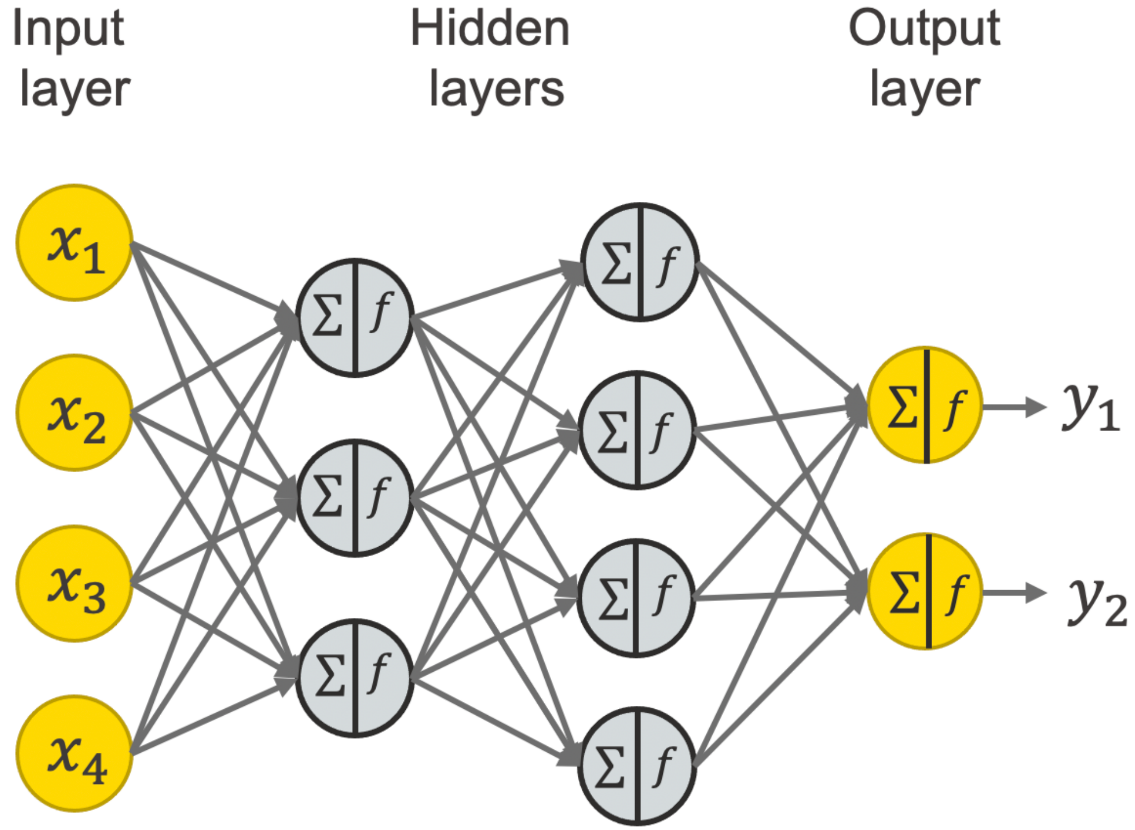

## Components of a neural network

- weight(가중치) = 네트워크의 출력이 예상 출력 값에 얼마나 근접하는지에 영향을 미칩니다.
- bias(편향) = 활성화 함수의 출력과 의도한 출력 간의 차이를 나타냅니다.
$$
y = f(w_1x_1 + w_2x_2 + b)
$$
$$
y = f(\sum{w_ix_i}+b)
$$

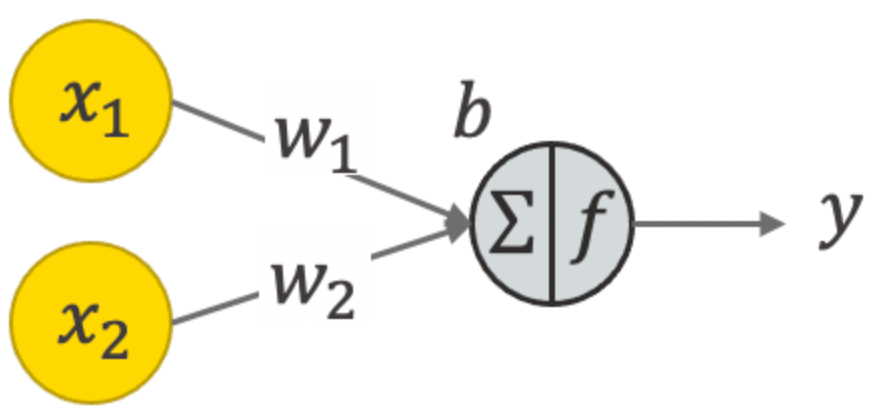

# [Build a neural network](https://learn.microsoft.com/en-us/training/modules/intro-machine-learning-pytorch/4-model)

In [1]:
%matplotlib inline
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

## 1.Get a hardware device for training

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using {} device'.format(device))

Using cuda device


## 2.Define the class

In [3]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__() # super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
            nn.ReLU()
        )

    def forward(self, x): # (28, 28)
        out_flatten = self.flatten(x) # out_flatten: (28*28,)
        logits = self.linear_relu_stack(out_flatten) # logits: (10,)
        return logits

NeuralNetwork를 만들고 device에 적용

In [4]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
)


In [5]:
X = torch.rand(1, 28, 28, device=device)
X.shape

torch.Size([1, 28, 28])

In [6]:
X.device

device(type='cuda', index=0)

In [7]:
logits = model(X)
logits.shape

torch.Size([1, 10])

In [8]:
logits

tensor([[0.1567, 0.1313, 0.1589, 0.0000, 0.0598, 0.0000, 0.0020, 0.1358, 0.0000,
         0.0327]], device='cuda:0', grad_fn=<ReluBackward0>)

In [9]:
pred_probab = nn.Softmax(dim=1)(logits)
pred_probab.shape

torch.Size([1, 10])

In [10]:
pred_probab

tensor([[0.1091, 0.1063, 0.1093, 0.0932, 0.0990, 0.0932, 0.0934, 0.1068, 0.0932,
         0.0963]], device='cuda:0', grad_fn=<SoftmaxBackward0>)

In [11]:
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([2], device='cuda:0')


## 3.Weight and Bias

In [12]:
print(f"1 Linear weights: {model.linear_relu_stack[0].weight.shape} \n") # (512, 28*28)
print('-'*50)
print(f"1 Linear weights: {model.linear_relu_stack[0].bias.shape} \n") # (512)

1 Linear weights: torch.Size([512, 784]) 

--------------------------------------------------
1 Linear weights: torch.Size([512]) 



In [13]:
print(f"2 Linear weights: {model.linear_relu_stack[2].weight.shape} \n") # (512, 512)
print('-'*50)
print(f"2 Linear weights: {model.linear_relu_stack[2].bias.shape} \n") # (512, 512)

2 Linear weights: torch.Size([512, 512]) 

--------------------------------------------------
2 Linear weights: torch.Size([512]) 



In [14]:
print(f"3 Linear weights: {model.linear_relu_stack[4].weight.shape} \n") # (10, 512)
print('-'*50)
print(f"3 Linear weights: {model.linear_relu_stack[4].bias.shape} \n") # (10)

3 Linear weights: torch.Size([10, 512]) 

--------------------------------------------------
3 Linear weights: torch.Size([10]) 



In [15]:
model.linear_relu_stack[4].weight

Parameter containing:
tensor([[-0.0284,  0.0050,  0.0023,  ..., -0.0015, -0.0219,  0.0351],
        [ 0.0068, -0.0292,  0.0132,  ..., -0.0370,  0.0266,  0.0073],
        [-0.0019, -0.0333, -0.0220,  ..., -0.0042, -0.0109, -0.0164],
        ...,
        [ 0.0352,  0.0406,  0.0295,  ...,  0.0436,  0.0424,  0.0347],
        [-0.0090,  0.0383,  0.0123,  ...,  0.0416, -0.0349, -0.0128],
        [-0.0393,  0.0091, -0.0185,  ..., -0.0368, -0.0096,  0.0372]],
       device='cuda:0', requires_grad=True)

In [16]:
model.linear_relu_stack[4].bias

Parameter containing:
tensor([ 0.0378,  0.0084,  0.0138,  0.0430, -0.0135, -0.0083, -0.0054, -0.0173,
         0.0268, -0.0302], device='cuda:0', requires_grad=True)

## 4.Model layers

In [17]:
input_image = torch.rand(3,28,28)
print(input_image.size())

torch.Size([3, 28, 28])


### nn.Flatten

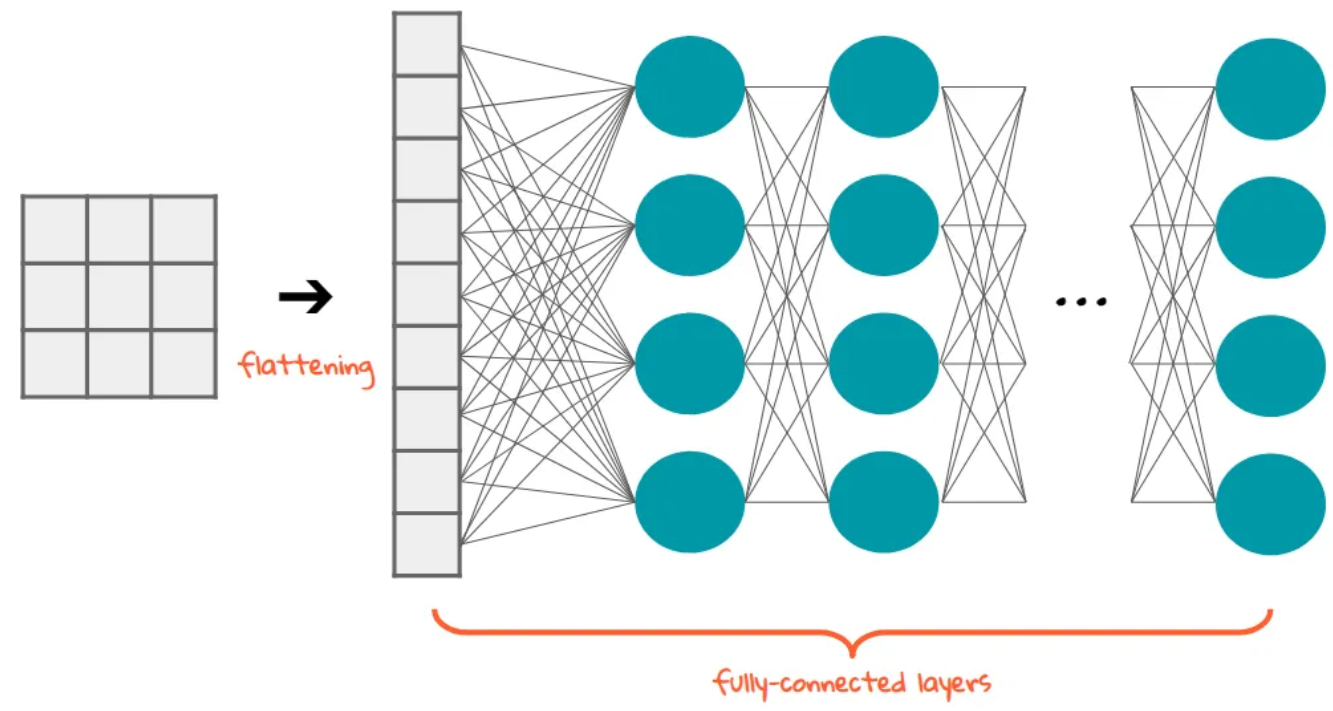

In [18]:
# flatten 생성
flatten = nn.Flatten()

flat_image = flatten(input_image) # (3, 28, 28)
print(flat_image.size()) # (3, 28 * 28)

torch.Size([3, 784])


### nn.Linear

In [19]:
# linear 생성
layer1 = nn.Linear(in_features=28*28, out_features=20)

hidden1 = layer1(flat_image) # (3, 28 * 28)
print(hidden1.size())

torch.Size([3, 20])


### nn.ReLU
Linear output: x = weight * input + bias       
ReLU: f(x) = 0 if x < 0 else x

In [20]:
print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

Before ReLU: tensor([[-0.1537, -0.0536, -0.1166, -0.2033,  0.1935, -0.2760,  0.0159, -0.0861,
         -0.3860,  0.6826,  0.3903,  0.1089,  0.0921, -0.0800,  0.0670, -0.1415,
         -0.2923, -0.0099, -0.3269, -0.2165],
        [ 0.0262, -0.3059,  0.2039, -0.1440, -0.0036, -0.5156, -0.0026, -0.2778,
          0.1190,  0.3486,  0.1918,  0.1606, -0.2452, -0.3085, -0.0163, -0.3343,
         -0.0896, -0.0632, -0.5193, -0.0310],
        [-0.1353, -0.3064, -0.1411, -0.3220,  0.0596, -0.1870, -0.0703, -0.3782,
          0.3079,  0.5856,  0.1491,  0.0956, -0.2019, -0.1923,  0.1398, -0.1609,
         -0.0272, -0.0894, -0.2542, -0.0902]], grad_fn=<AddmmBackward0>)


After ReLU: tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.1935, 0.0000, 0.0159, 0.0000, 0.0000,
         0.6826, 0.3903, 0.1089, 0.0921, 0.0000, 0.0670, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000],
        [0.0262, 0.0000, 0.2039, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1190,
         0.3486, 0.1918, 0.1606, 0.0000, 0.0000, 0.00

### nn.Sequential

In [21]:
seq_modules = nn.Sequential(
    flatten,
    layer1, # (28*28, 20)
    nn.ReLU(),
    nn.Linear(20, 10)
)

input_image = torch.rand(3,28,28)

logits = seq_modules(input_image)

logits.shape

torch.Size([3, 10])

### nn.Softmax

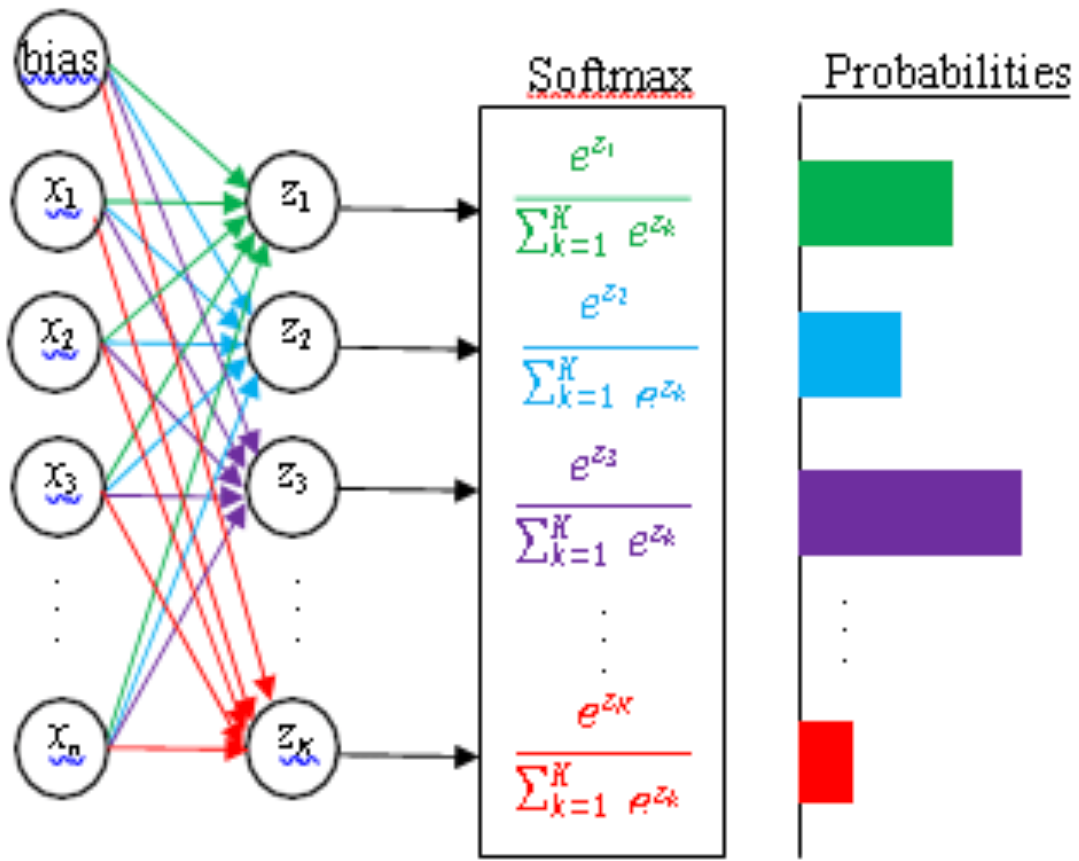

In [22]:
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)
pred_probab.shape

torch.Size([3, 10])

## 5.Model parameters

In [23]:
print("Model structure: ", model, "\n\n")

for i, (name, param) in enumerate(model.named_parameters()):
    print(f"{i}번째, Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure:  NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
) 


0번째, Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values : tensor([[-0.0179, -0.0289,  0.0060,  ..., -0.0161, -0.0276, -0.0070],
        [-0.0148, -0.0355,  0.0154,  ..., -0.0312,  0.0239,  0.0295]],
       device='cuda:0', grad_fn=<SliceBackward0>) 

1번째, Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values : tensor([-0.0072, -0.0123], device='cuda:0', grad_fn=<SliceBackward0>) 

2번째, Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values : tensor([[-0.0141, -0.0350,  0.0066,  ...,  0.0229,  0.0294, -0.0250],
        [ 0.0381, -0.0353, -0.0044,  ..., -0.0104,  0.0045, -0.0058]],
  

# Automatic differentiation(자동미분)
- Gradient Descent를 이용해 손실함수의 최솟값을 쫓아가면서 가중치들을 업데이트하는 것을 말합니다.
- Automatic differentiation은 Forward Propagation(순전파) -> Backward Propagation(역전파) 순서로 진행됩니다.

## Forward Propagation(순전파)
> 신경망은 정답을 맞추기 위해 최선의 추측을 합니다. 이렇게 추측을 하기 위해서 입력 데이터를 각 함수들에서 실행합니다.

## Backward Propagation(역전파)
> 신경망은 추측한 값에서 발생한 오류에 비례하여 매개변수들을 적절히 조절합니다.

## Tensors, Functions and Computational graph

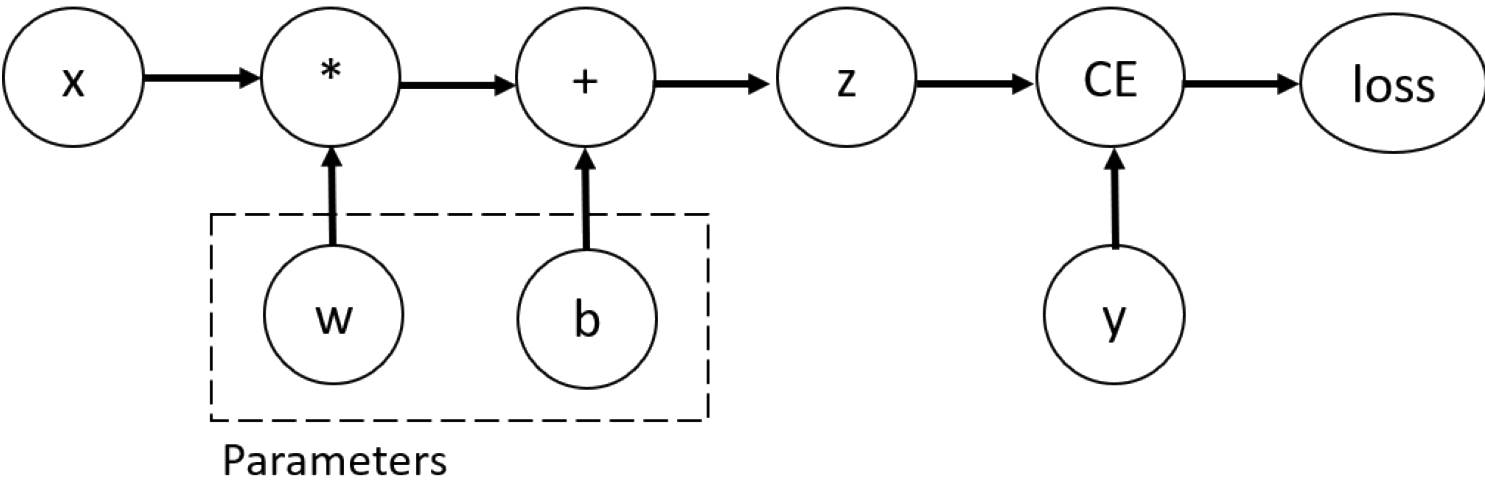

In [24]:
%matplotlib inline
import torch

x = torch.ones(5)  # input tensor
y = torch.zeros(3)  # expected output

w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)

z = torch.matmul(x, w) + b # wx + b

loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)
loss

tensor(0.9247, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)

In [25]:
w

tensor([[-0.7985,  1.6411, -1.6682],
        [-0.2333,  1.3976,  0.6337],
        [ 0.5582, -0.5368,  1.6766],
        [-0.4598,  0.1284, -0.3151],
        [ 1.0441, -0.2878, -2.4408]], requires_grad=True)

In [26]:
b

tensor([-1.7701, -0.1306,  1.0017], requires_grad=True)

In [27]:
print('Gradient function for z =',z.grad_fn)
print('Gradient function for loss =', loss.grad_fn)

Gradient function for z = <AddBackward0 object at 0x7c0463f2ad10>
Gradient function for loss = <BinaryCrossEntropyWithLogitsBackward0 object at 0x7c03a3897c10>


## Computing gradients

In [28]:
loss.backward()

print(w.grad)
print(b.grad)

tensor([[0.0533, 0.3004, 0.0825],
        [0.0533, 0.3004, 0.0825],
        [0.0533, 0.3004, 0.0825],
        [0.0533, 0.3004, 0.0825],
        [0.0533, 0.3004, 0.0825]])
tensor([0.0533, 0.3004, 0.0825])


## Disabling gradient tracking

In [29]:
z = torch.matmul(x, w)+b
print(z.requires_grad)

with torch.no_grad(): # No gradient tracking(테스트용)
    z = torch.matmul(x, w)+b
print(z.requires_grad)

True
False


another way to achieve the same result is to use the `detach()` method on the tensor

In [30]:
z = torch.matmul(x, w)+b
z_det = z.detach() # No gradient tracking(테스트용)
print(z_det.requires_grad)

False
